---
layout: default
title: "Neural Networks - Backpropagation 2"
categories: neuralNetwork
permalink: /ML17/
order: 17
comments: true
---

In [1]:
%pylab --no-import-all inline
from plot_ann import ann

Populating the interactive namespace from numpy and matplotlib


# Gradient checking
Back-propagation is a tricky algorithm and sometimes a bugged implementation of it might still seem to work properly but it would not ensure a good minimization.

In order to find out bugs in back-propagation a technique called **gradient checking** can be used.

Until now we more or less accepted that provided formulas would compute the derivative of the cost function and numerical gradient checking gives us a method to verify that your implementation actually computes the derivative of the cost function $J(\Theta)$.

Suppose that out cost function looks like this and that $\Theta \in \mathbb{R}$

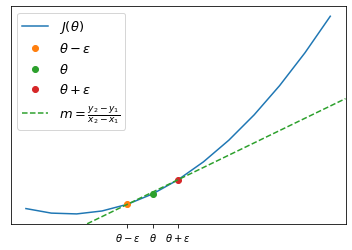

In [2]:
x = np.linspace(-.1, .6, 13)

fig, ax = plt.subplots()
ax.plot(x, x**2, label='$J(\\theta)$')

center = 5
indexes = [center-1, center, center+1]
labels = ['$\\theta-\\epsilon$', '$\\theta$', '$\\theta+\\epsilon$']
for idx, label in zip(indexes, labels):
    ax.plot(x[idx], x[idx]**2, marker='o', ls='none', label=label)

xx = x[indexes[::2]]
yy = xx**2
ax.axline([xx[0], yy[0]], slope=np.diff(yy)[0]/np.diff(xx)[0],  c='C2', 
          label=r'$m=\frac{y_2 - y_1}{x_2-x_1}$', ls='--')

ax.legend(fontsize=13)
ax.set_xticks(x[indexes])
ax.set_xticklabels(labels)
ax.set_yticks([]);

If we want to estimate the derivative we will take $\theta-\epsilon$ and $\theta+\epsilon$ where $\epsilon \approx 0$ and we will compute the slope of the line passing per $\theta-\epsilon, \theta+\epsilon$

$$
\frac{d}{d\theta}\approx\frac{J(\theta+\epsilon)-J(\theta - \epsilon)}{2\epsilon}
$$

For $\epsilon$ small enough this numerical approximation becomes actually the derivative $\frac{d}{d\theta}$ but in order not to incurr in numerical problems we can use a $\epsilon \approx 10^{-4}$

In the case of $\theta \in \mathbb{R}^n$ we can use this strategy to check the gradient

$$
\begin{align}
& \frac{\partial}{\partial\theta_1}J(\theta) \approx \frac{J(\theta_1 + \epsilon,\theta_2,\dots,\theta_n) - J(\theta_1-\epsilon,\theta_2,\dots,\theta_n)}{2\epsilon}\\
& \frac{\partial}{\partial\theta_2}J(\theta) \approx \frac{J(\theta_1, \theta_2 + \epsilon,\dots,\theta_n) - J(\theta_1,\theta_2-\epsilon,\dots,\theta_n)}{2\epsilon}\\
& \;\; \vdots \\
& \frac{\partial}{\partial\theta_n}J(\theta) \approx \frac{J(\theta_1,\theta_2,\dots,\theta_n + \epsilon) - J(\theta_1,\theta_2,\dots,\theta_n-\epsilon)}{2\epsilon}
\end{align}
$$

# Random initialization
When performing optimization (e.g. gradient descent) we need to choose some initial value for $\Theta$ and it is possible to initialize $\Theta$ to a vector of $0$. While this strategy works when using logistic regression it doesn't when training an ANN. Let's take the example of a simple ANN where $\Theta_{ij}^{(l)}$ is set to $0$ for all $i, j, l$

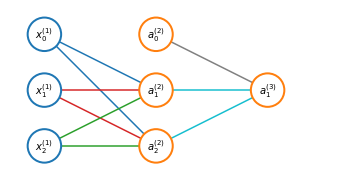

In [23]:
ax, *_ = ann([3, 3, 1], radius=2, height=.5, node_colors=True, node_labels=True, node_lw=2, edge_from_center=True,
             edge_colors=['C0']*2+['C3']*2+['C2']*2+['grey','C9','C9'], edge_lw=1.5, bias=True)
ax.set_aspect('equal')

This will result in both of the hidden units $\color{blue}{a_1^{(2)}, a_2^{(2)}}$ will compute the same function of each input. This means that for every training example you will end up with $\color{blue}{a_1^{(2)} = a_2^{(2)}}$ and it can be shown also that $\color{blue}{\delta_1^{(2)} = \delta_2^{(2)}}$. Consequently 

$$\color{blue}{\frac{\partial}{\partial\Theta_{01}^{(1)}}J(\Theta)=\frac{\partial}{\partial\Theta_{02}^{(1)}}J(\Theta)}$$ 

and this means that even after one gredient descent update $\color{blue}{\Theta_{01}^{(1)}=\Theta_{02}^{(1)}}$. And the same goes for $\color{red}{\Theta_{01}^{(1)}=\Theta_{02}^{(1)}}$ and $\color{green}{\Theta_{01}^{(1)}=\Theta_{02}^{(1)}}$.

In order to get around this proble an ANN is randomly initialized. Each $\Theta_{ij}^{(l)}$ is initialized to a random value in $[-\epsilon, \epsilon]$